In [1]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
pip install --upgrade scikit-learn


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

from scipy import stats

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [5]:
data = pd.read_csv("C:/Users/VNPT10/OneDrive/Máy tính/train.csv/train.csv")

In [6]:
data1 = pd.read_csv("C:/Users/VNPT10/OneDrive/Máy tính/test.csv/test.csv")

In [7]:
def transform_gender(x):
    if x == 'Female':
        return 1
    elif x == 'Male':
        return 0
    else:
        return -1
    
def transform_customer_type(x):
    if x == 'Loyal Customer':
        return 1
    elif x == 'disloyal Customer':
        return 0
    else:
        return -1
    
def transform_travel_type(x):
    if x == 'Business travel':
        return 1
    elif x == 'Personal Travel':
        return 0
    else:
        return -1
    
def transform_class(x):
    if x == 'Business':
        return 2
    elif x == 'Eco Plus':
        return 1
    elif x == 'Eco':
        return 0    
    else:
        return -1
    
def transform_satisfaction(x):
    if x == 'satisfied':
        return 1
    elif x == 'neutral or dissatisfied':
        return 0
    else:
        return -1
    
def process_data(df):
    df = df.drop(['Unnamed: 0', 'id'], axis = 1)
    df['Gender'] = df['Gender'].apply(transform_gender)
    df['Customer Type'] = df['Customer Type'].apply(transform_customer_type)
    df['Type of Travel'] = df['Type of Travel'].apply(transform_travel_type)
    df['Class'] = df['Class'].apply(transform_class)
    df['satisfaction'] = df['satisfaction'].apply(transform_satisfaction)
    df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace = True)
    
    return df

In [8]:
train = process_data(data)
test = process_data(data1)

In [9]:
train.shape

(103904, 23)

In [10]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,0,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  int64  
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  int64  
 4   Class                              103904 non-null  int64  
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [12]:
train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,0,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1,0,23,1,0,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,0,1,49,1,2,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,0,0,30,1,2,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,1,0,22,1,0,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


In [13]:
train.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

Có thể nhận thấy những điều sau:

1. Cột "Arrival Delay in Minutes"  có 310 giá trị bị thiếu.
2. Hai cột đầu tiên không có tác dụng và sẽ không ảnh hưởng đến việc phân loại, vì vậy sẽ xóa 2 cột này đi.
3. Nhiều cột chứa các giá trị "Categorical" nhưng thuộc loại 'Object' hoặc 'int64'. Chuyển type những cột này thành "Categorical".

In [14]:
#Điền các giá trị còn thiếu bằng số Medians vào cột "Arrival Delay in Minutes":

In [15]:
#Hai cột đầu tiên không có tác dụng và sẽ không ảnh hưởng đến việc phân loại, vì vậy sẽ xóa 2 cột này đi.

In [16]:
#Nhiều cột chứa các giá trị "Categorical" nhưng thuộc loại 'Object' hoặc 'int64'. Chuyển type những cột này thành "Categorical".
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
train.iloc[:,categorical_indexes] = train.iloc[:,categorical_indexes].astype('category')

In [17]:
train['Gender'] = train['Gender'].astype('category') 
train['Customer Type'] = train['Customer Type'].astype('category') 
train['Type of Travel'] = train['Type of Travel'].astype('category') 
train['Class'] = train['Class'].astype('category')  


In [18]:
train.info()
#Định dang chuẩn rồi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

In [19]:
train

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,1,13,0,1,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,2,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,2,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,2,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,2,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1,0,23,1,0,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,0,1,49,1,2,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,0,0,30,1,2,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,1,0,22,1,0,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


In [20]:
train.describe()

#Đối với mỗi thuộc tính định lượng (quantitative attribute), các giá trị trung bình, độ lệch chuẩn, giá trị tối thiểu và tối đa, giá trị trung bình và tứ phân vị được đưa ra.

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392,0.433333
std,15.114964,997.147281,38.230901,38.649776,0.495538
min,7.000000,31.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000,1.000000
max,85.000000,4983.000000,1592.000000,1584.000000,1.000000


In [21]:
train.describe(include = ['category'])
#Với mỗi cột thể hiện bao nhiêu giá trị trong cột, số các giá trị khác nhau, giá trị nào xuất hiện nhiều nhất, số lần xuất hiện.

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,1,1,1,2,3,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179


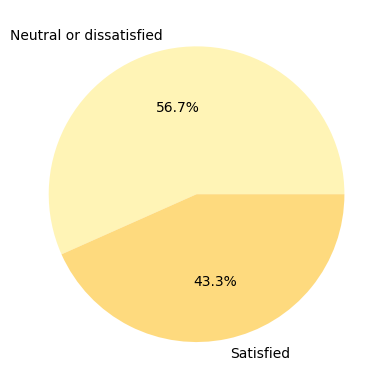

In [22]:
plt.pie(train.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass

#Thể hiện tỉ lệ hài lòng hoặc không hài lòng của tất cả khách hàng

In [23]:
data2 = train[['Age','Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']]

In [24]:
corr_mat = data2.corr()
corr_mat

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,0.099461,-0.010152,-0.012105
Flight Distance,0.099461,1.000000,0.002158,-0.002470
Departure Delay in Minutes,-0.010152,0.002158,1.000000,0.960247
Arrival Delay in Minutes,-0.012105,-0.002470,0.960247,1.000000


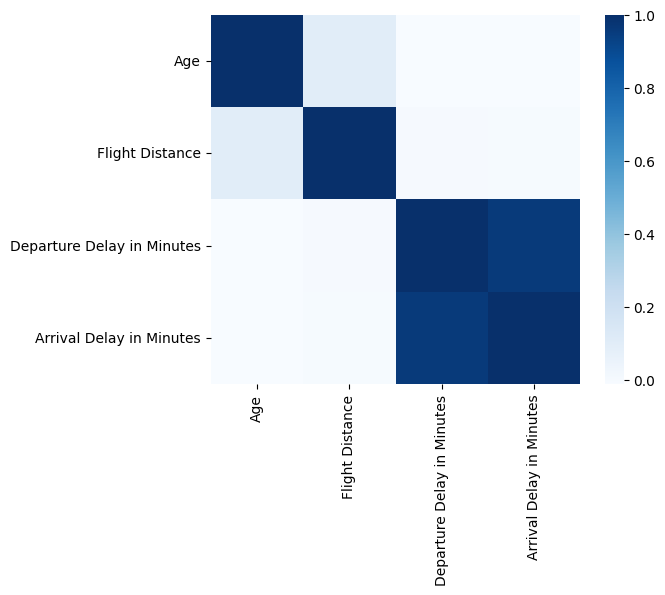

In [25]:
sns.heatmap(corr_mat, square = True, cmap = 'Blues')
pass

In [26]:
#Bạn có thể thấy rằng có sự tương quan chặt chẽ giữa tính năng “Departure Delay in Minutes” và “Arrival Delay in Minutes”. Giá trị của hệ số tương quan đạt giá trị sau:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending = False)

Departure Delay in Minutes  Arrival Delay in Minutes    0.960247
dtype: float64

0,9602

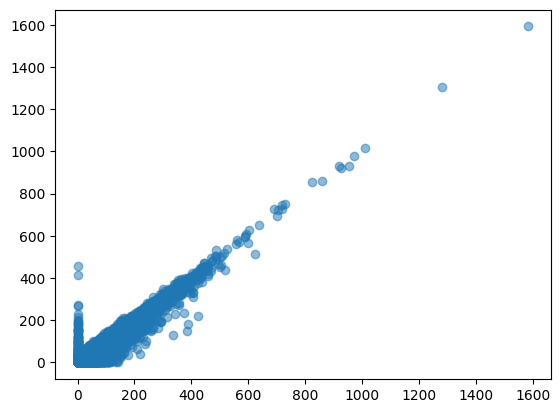

In [27]:
plt.scatter(train['Arrival Delay in Minutes'], train['Departure Delay in Minutes'], alpha = 0.5)
pass

Nhìn vào thì ta biết được rằng delay khi lúc bay càng lâu thì delay lúc hạ cánh cũng thế, rất hiển nhiên.

Xem xét tỉ lệ của các Categorical Features khác:

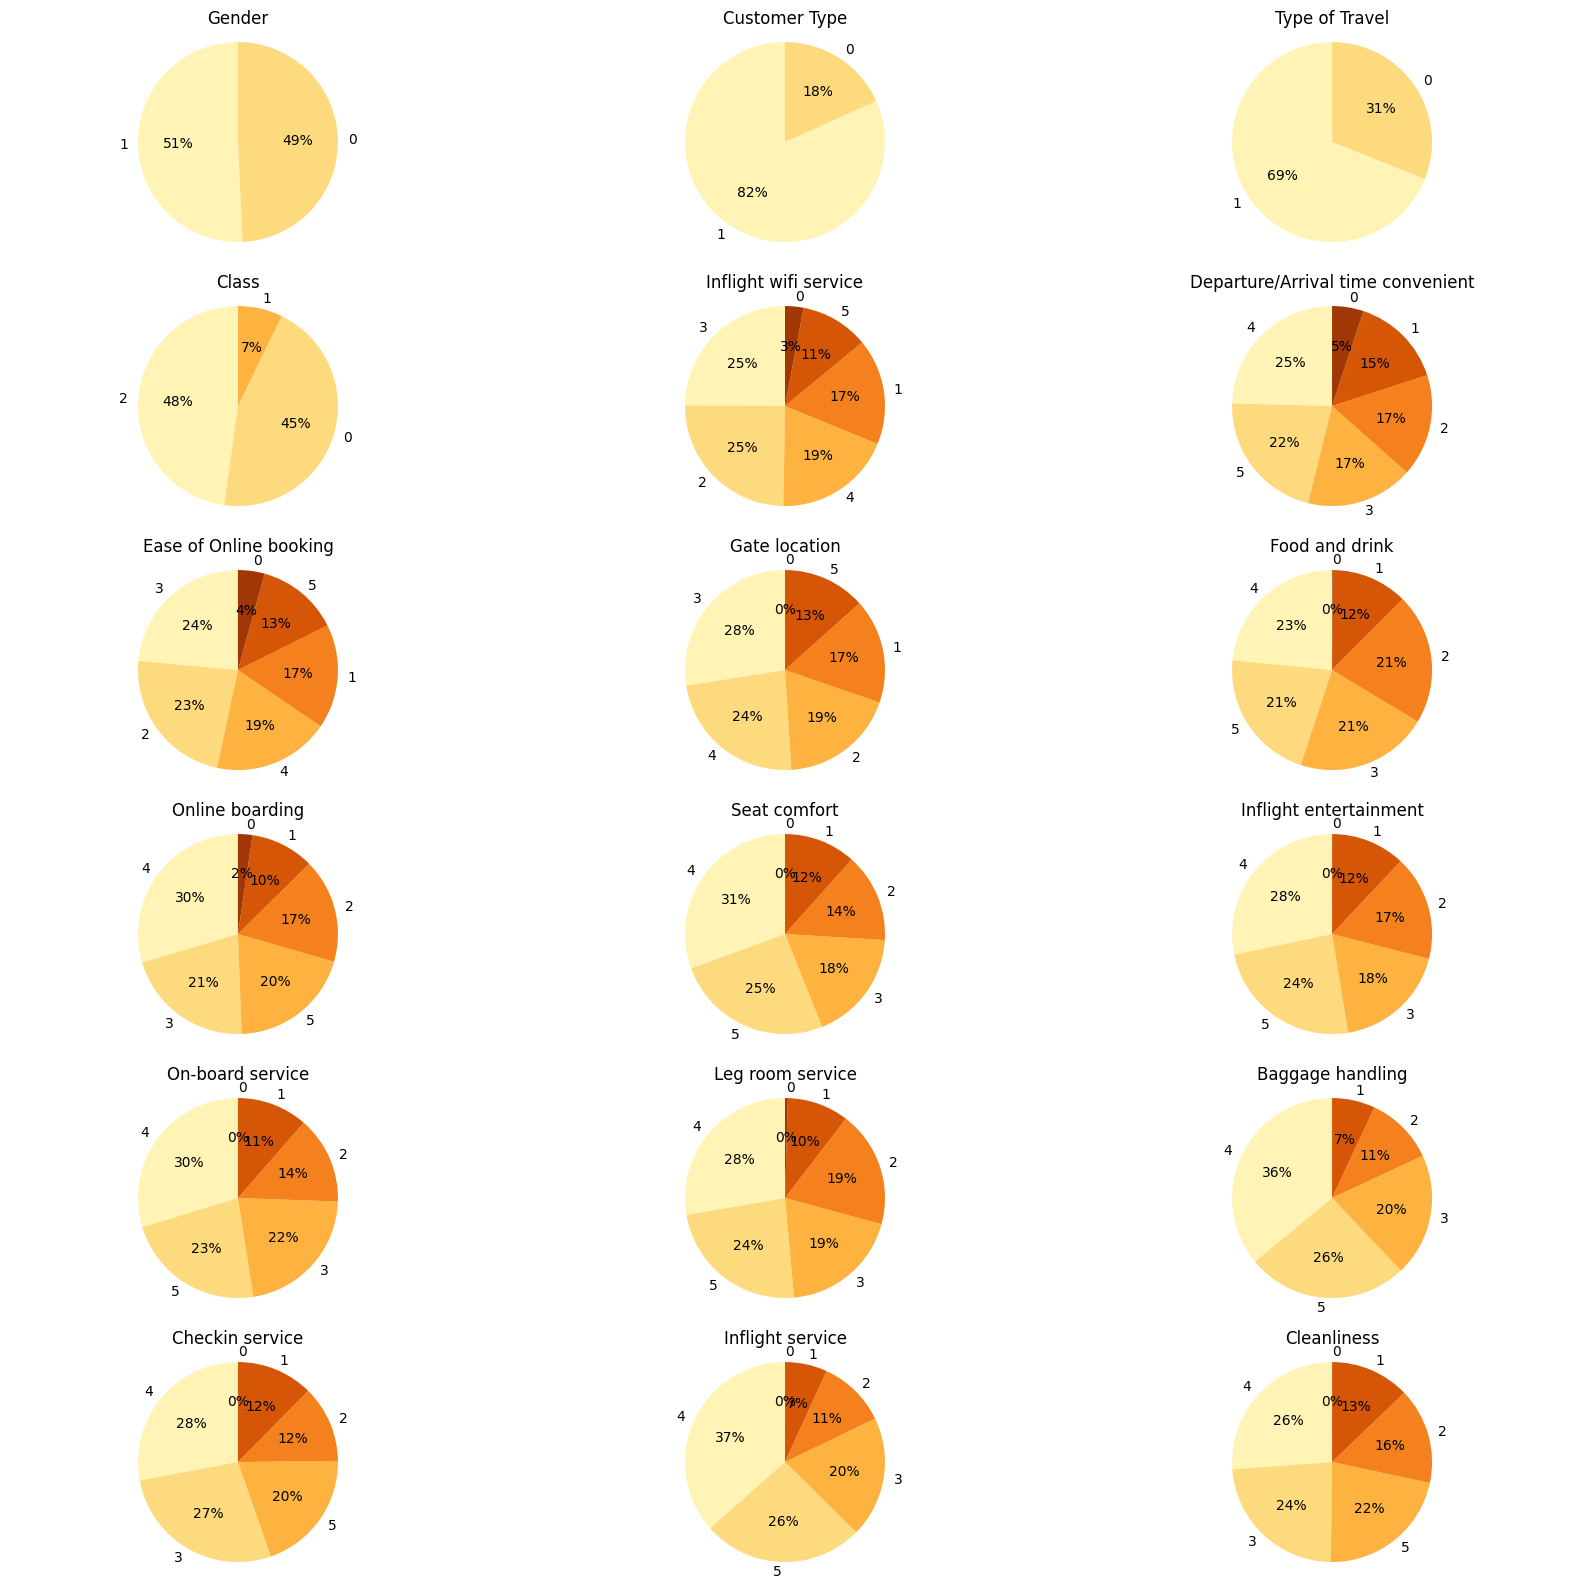

In [28]:
categ = train.iloc[:,categorical_indexes]
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(categ):
    column_values = train[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("YlOrBr"), autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

Một số kết luận về mẫu được xem xét:

- Số lượng nam và nữ trong mẫu này xấp xỉ nhau
- Phần lớn khách hàng của hãng hàng không này là khách hàng thường xuyên
- Hầu hết khách hàng bay vì lý do công việc hơn là vì lý do cá nhân
- Khoảng một nửa số hành khách ngồi ở hạng thương gia
- Hơn 60% hành khách hài lòng với dịch vụ vận chuyển hành lý (đánh giá 4-5/5)
- Hơn 50% hành khách cảm thấy thoải mái khi ngồi vào chỗ ngồi của mình (đánh giá 4-5/5)

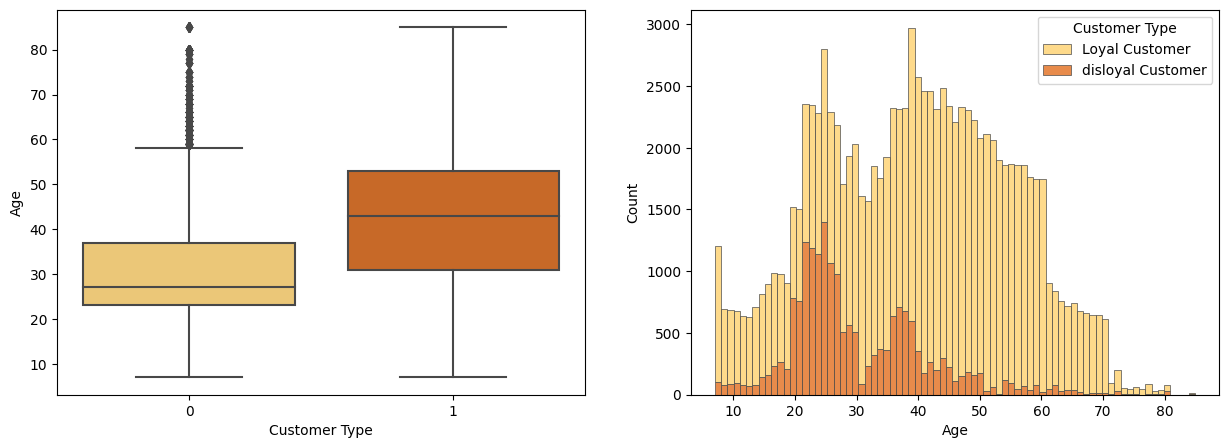

In [29]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Customer Type", y = "Age", palette = "YlOrBr", data = train, ax = ax[0])
sns.histplot(data, x = "Age", hue = "Customer Type", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

-Độ tuổi của các khách hàng trung thành từ 20-60, đặc biệt trong các khoảng 20-30, 40-50, giảm dần đến 60.

-Độ tuổi của các khách hàng không trung thành từ 20-30 là chủ yếu.

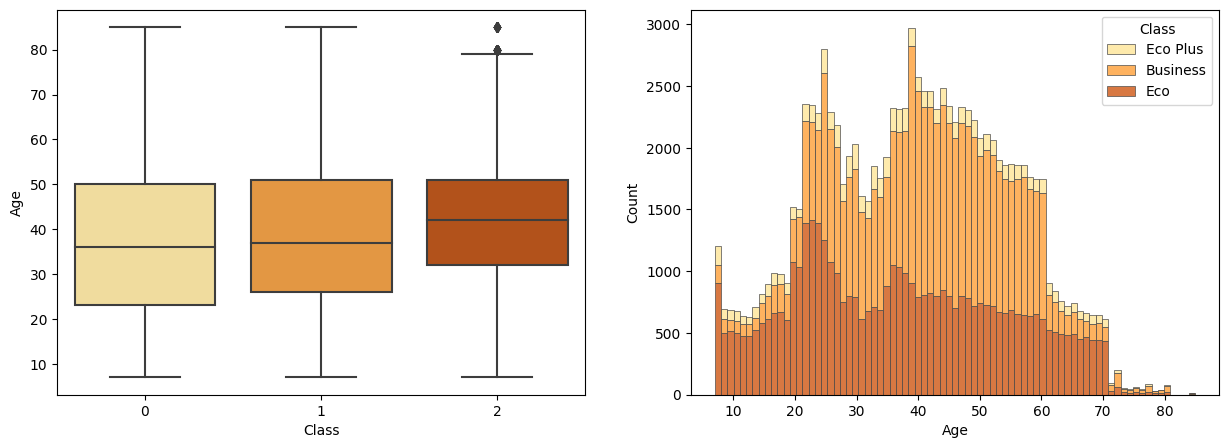

In [30]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Age", palette = "YlOrBr", data = train, ax = ax[0])
sns.histplot(data, x = "Age", hue = "Class", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

Có thể thấy rằng, trung bình, độ tuổi của những khách hàng đi hạng thương gia (theo biểu đồ trước) cũng tương đương với độ tuổi của khách hàng thường xuyên. Dựa trên quan sát này, có thể giả định rằng khách hàng thường xuyên chủ yếu mua vé hạng thương gia cho mình.

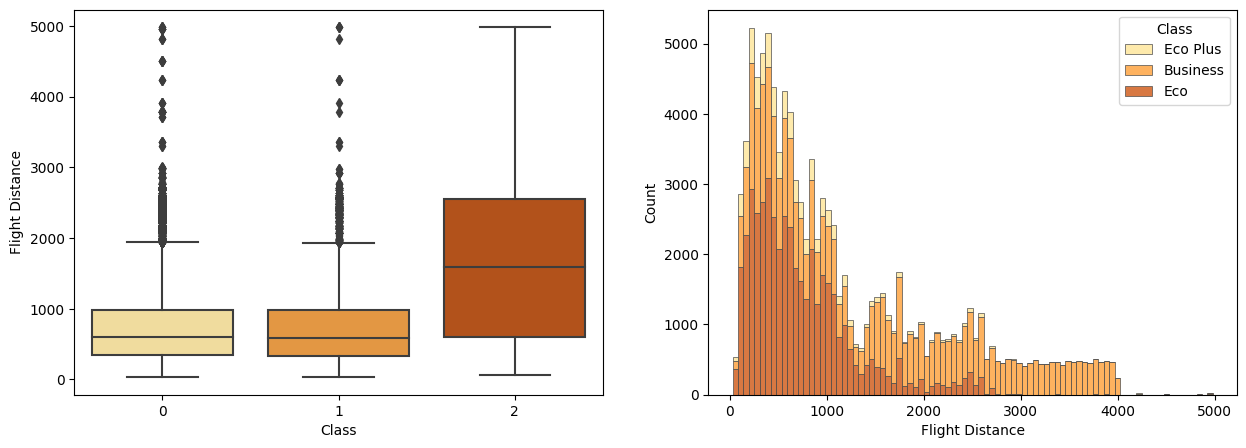

In [31]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "YlOrBr", data = train, ax = ax[0])
sns.histplot(data, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

Từ sơ đồ này có thể rút ra kết luận sau: 
- Những khách hàng có chặng bay dài, chủ yếu bay ở hạng thương gia.

- Khách hàng chủ yếu đi những chuyến bay từ 1000km ở tất cả các hạng nhưng chủ yếu là hạng thương gia

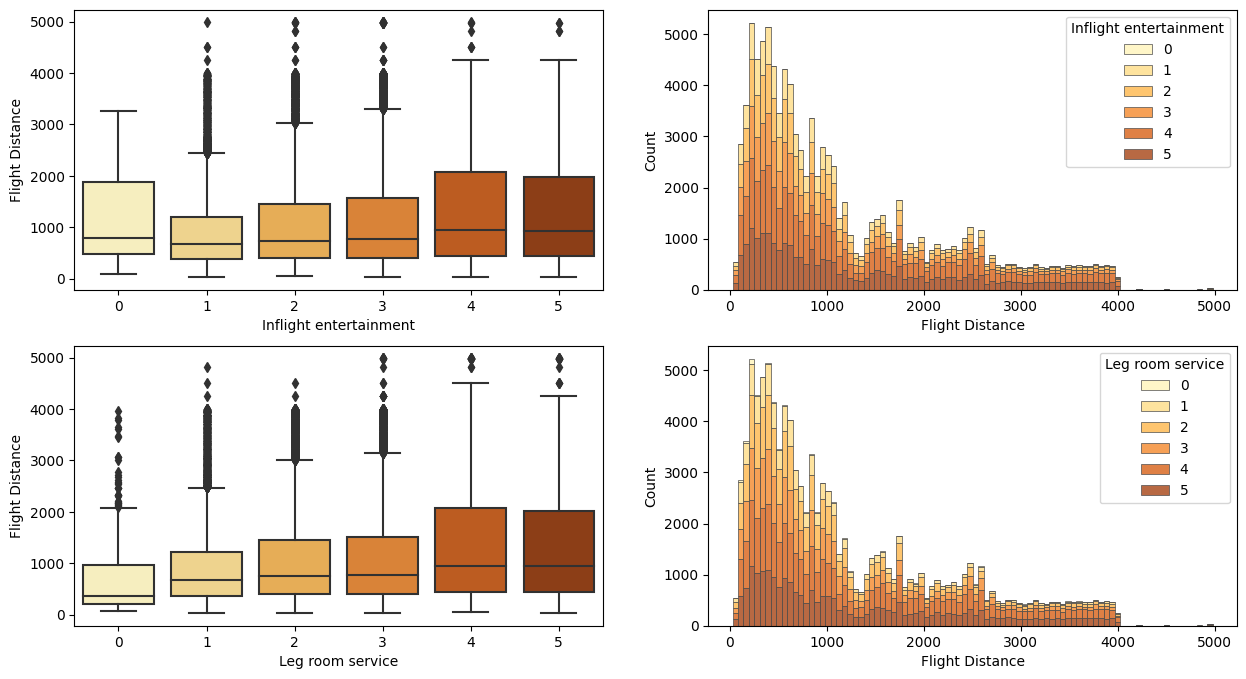

In [32]:
f, ax = plt.subplots(2, 2, figsize = (15,8))
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", palette = "YlOrBr", data = train, ax = ax[0, 0])
sns.histplot(train, x = "Flight Distance", hue = "Inflight entertainment", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Leg room service", y = "Flight Distance", palette = "YlOrBr", data = train, ax = ax[1, 0])
sns.histplot(train, x = "Flight Distance", hue = "Leg room service", multiple = "stack", palette = "YlOrBr", edgecolor = ".3", linewidth = .5, ax = ax[1, 1])
pass

Có thể thấy mô hình sau: hành khách đi máy bay càng đi xa (họ ở trên chuyến bay càng lâu), họ càng hài lòng với sự giải trí trên chuyến bay và chỗ để chân rộng hơn (trung bình).

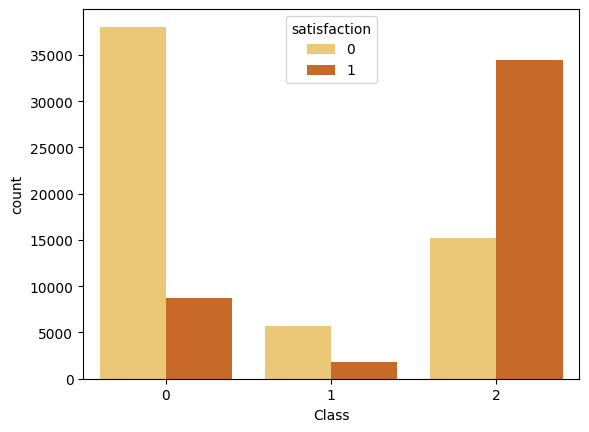

In [33]:
sns.countplot(x = 'Class', hue = 'satisfaction', palette = "YlOrBr", data = train)
plt.show()

Hạng thương gia có tỉ lệ khách hàng thỏa mãn nhất, Hạng Eco có tỉ lệ khách hàng không hài lòng nhất 
-> Đưa ra giải pháp gì?

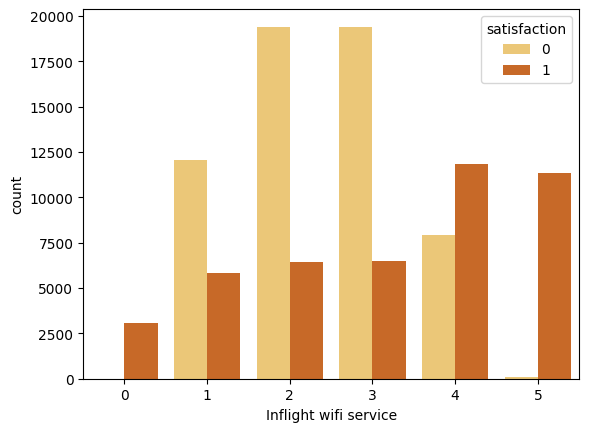

In [34]:
sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', palette = "YlOrBr", data = train)
plt.show()

Rất hiển nhiên ta thấy rằng đánh giá dịch vụ Wifi càng tốt thì họ càng thỏa mãn khi bay và ngược lại

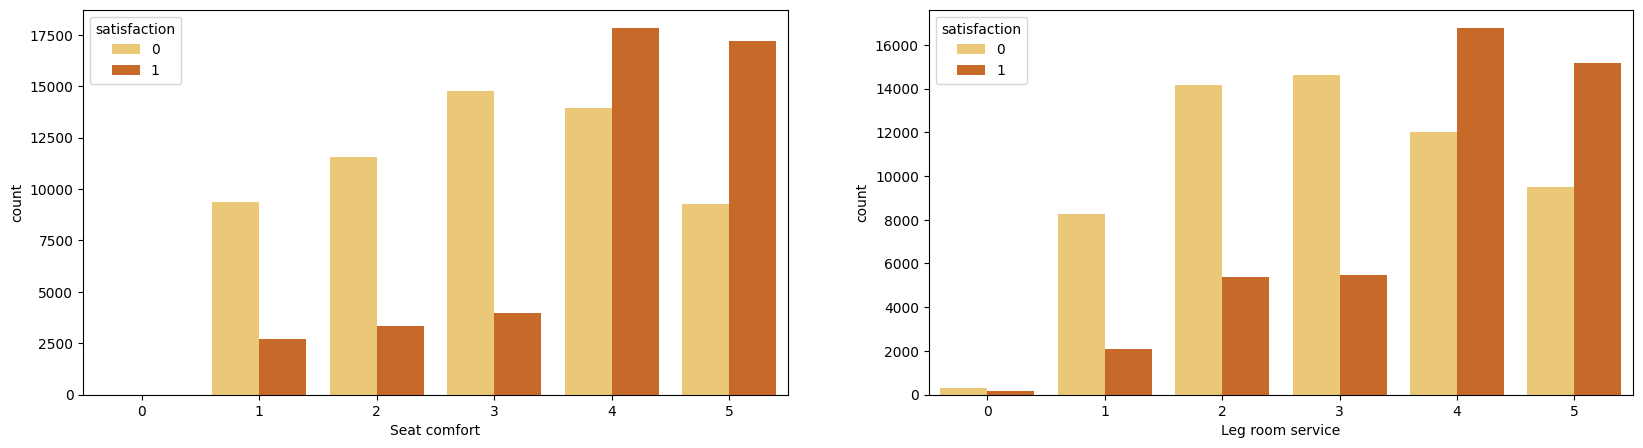

In [35]:
f, ax = plt.subplots(1, 2, figsize = (20,5))
sns.countplot(x = 'Seat comfort', hue = 'satisfaction', palette = "YlOrBr", data = train,ax = ax[0])
sns.countplot(x = 'Leg room service', hue = 'satisfaction', palette = "YlOrBr", data = train, ax = ax[1])
plt.show()

Tương tự, đánh giá càng cao thì càng thoải mái

In [36]:
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [37]:
#Define our features and target (this is helpful in case you would like to drop any features that harm model performance)
features = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
target = ['satisfaction']

# Split into test and train
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [38]:
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    print("ROC_AUC = {}".format(roc_auc))
    print(accuracy_score(y_test,y_pred))
    
    return model, roc_auc

In [39]:
params_rf = {'max_depth': 25,
         'min_samples_leaf': 1,
         'min_samples_split': 2,
         'n_estimators': 1200,
         'random_state': 42}

model_rf = RandomForestClassifier(**params_rf)
model_rf, roc_auc_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

ROC_AUC = 0.9616803653723137
0.9639282414536495


In [51]:
import lightgbm as lgb
import xgboost as xgb
import catboost as cb

                                              0.0/101.0 MB ? eta -:--:--
                                              0.1/101.0 MB 3.2 MB/s eta 0:00:32
                                              0.5/101.0 MB 6.2 MB/s eta 0:00:17
                                              1.1/101.0 MB 8.5 MB/s eta 0:00:12
                                             1.8/101.0 MB 10.3 MB/s eta 0:00:10
     -                                       2.8/101.0 MB 12.6 MB/s eta 0:00:08
     -                                       3.7/101.0 MB 13.8 MB/s eta 0:00:08
     -                                       4.6/101.0 MB 14.8 MB/s eta 0:00:07
     --                                      5.6/101.0 MB 15.4 MB/s eta 0:00:07
     --                                      6.3/101.0 MB 16.1 MB/s eta 0:00:06
     --                                      6.5/101.0 MB 14.4 MB/s eta 0:00:07
     --                                      7.3/101.0 MB 14.6 MB/s eta 0:00:07
     --                                      7.


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
params_lgb ={'colsample_bytree': 0.85, 
         'max_depth': 15, 
         'min_split_gain': 0.1, 
         'n_estimators': 200, 
         'num_leaves': 50, 
         'reg_alpha': 1.2, 
         'reg_lambda': 1.2, 
         'subsample': 0.95, 
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, roc_auc_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

[LightGBM] [Info] Number of positive: 45025, number of negative: 58879
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002644 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 948
[LightGBM] [Info] Number of data points in the train set: 103904, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.433333 -> initscore=-0.268267
[LightGBM] [Info] Start training from score -0.268267
ROC_AUC = 0.9626907253631617
0.9648906683092086


In [53]:
params_cb ={}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, roc_auc_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)

ROC_AUC = 0.962633632253299
0.9646981829380967


In [54]:
params_xgb ={}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, roc_auc_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

ROC_AUC = 0.5479984467544904
0.6031336618417


In [55]:
auc_scores = [roc_auc_rf, roc_auc_lgb, roc_auc_cb, roc_auc_xgb]
model_scores = pd.DataFrame(auc_scores, index=['Random Forest','LightGBM','Catboost','XGBoost'], columns=['AUC'])
model_scores.head()

,AUC
Random Forest,0.961680
LightGBM,0.962691
Catboost,0.962634
XGBoost,0.547998


Kết luận:

- Số lượng nam và nữ trong mẫu này gần như nhau.
- Phần lớn khách hàng của hãng hàng không này là khách hàng thường xuyên.
- Hầu hết khách hàng bay vì lý do công việc hơn là vì lý do cá nhân.
- Khoảng một nửa số hành khách ngồi ở hạng thương gia.
- Hơn 60% hành khách hài lòng với dịch vụ vận chuyển hành lý (đánh giá 4-5/5).
- Hơn 50% hành khách cảm thấy thoải mái khi ngồi chỗ ngồi của mình (được đánh giá 4-5/5).
- Có mối tương quan chặt chẽ (96%) giữa các tính năng 'Arrival Delay in Minutes' và 'Departure Delay in Minutes'.
- Hầu hết khách hàng thường xuyên của hãng đều ở độ tuổi từ 30 đến 50 (trung bình trên 40 một chút). Độ tuổi của khách hàng không thường xuyên nhỏ hơn một chút (từ 25 đến 40 tuổi, trung bình dưới 30).
- Những khách hàng có quãng đường bay dài thường chọn bay hạng thương gia.
- Hành khách đi máy bay càng đi xa (-họ ở trên chuyến bay càng lâu), họ càng hài lòng với giải trí trên chuyến bay và chỗ để chân rộng hơn (trung bình).
- Hầu hết hành khách bay ở Hạng Phổ thông hoặc Hạng Phổ thông đều không hài lòng với chuyến bay, còn những hành khách bay ở Hạng Thương gia thì hài lòng.
- Hầu hết hành khách đánh giá dịch vụ wifi 5/5 đều hài lòng với chuyến bay.
- Phần lớn hành khách đánh giá độ thoải mái của ghế ngồi và chỗ để chân rộng rãi ở mức 4 và 5 trên 5 đều hài lòng với chuyến bay.

Nên chọn máy học LightGBM vì điểm chính xác của nó là cao nhất so với các cái còn lại.